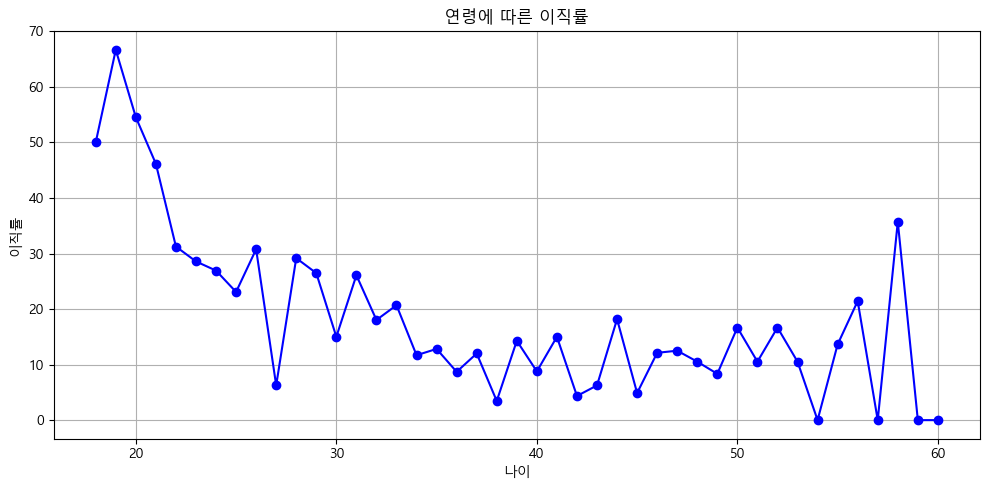

In [2]:
#2-1 시각화
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

file_path = 'C:\\Users\\ych14\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)

ageAttrition = data.groupby('Age')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
ageAttrition['Attrition Rate'] = ageAttrition['Yes'] * 100  

plt.figure(figsize=(10, 5))
plt.plot(ageAttrition.index, ageAttrition['Attrition Rate'], marker='o', color='blue')
plt.title('연령에 따른 이직률')
plt.xlabel('나이')
plt.ylabel('이직률')
plt.grid(True)
plt.tight_layout()
plt.show()


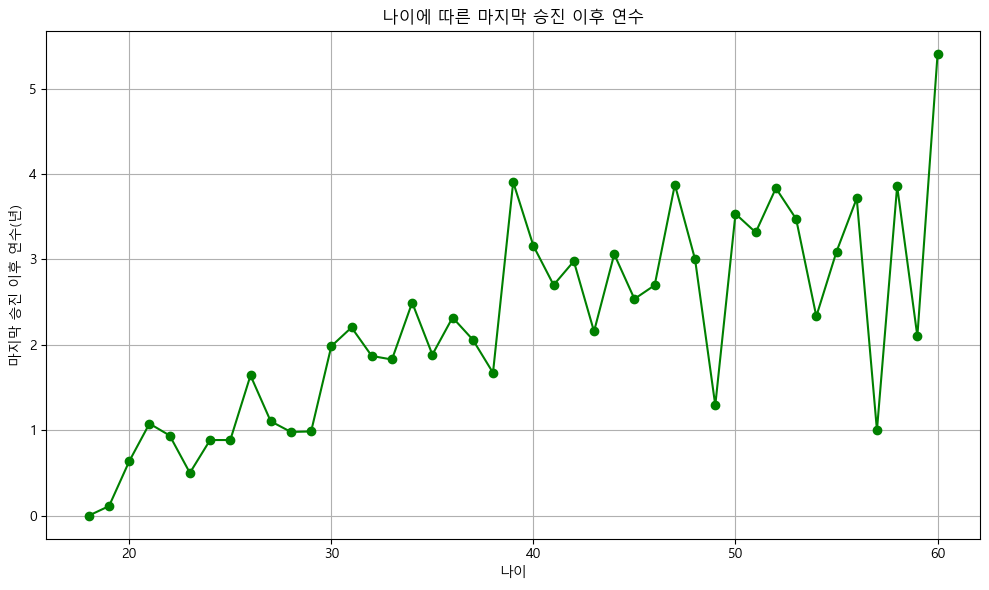

In [19]:
#2-2 시각화
age_promotion_years = data.groupby('Age')['YearsSinceLastPromotion'].mean()

plt.figure(figsize=(10, 6))
plt.plot(age_promotion_years.index, age_promotion_years.values, marker='o', color='green')
plt.title('나이에 따른 마지막 승진 이후 연수')
plt.xlabel('나이')
plt.ylabel('마지막 승진 이후 연수(년)')
plt.grid(True)
plt.tight_layout()
plt.show()


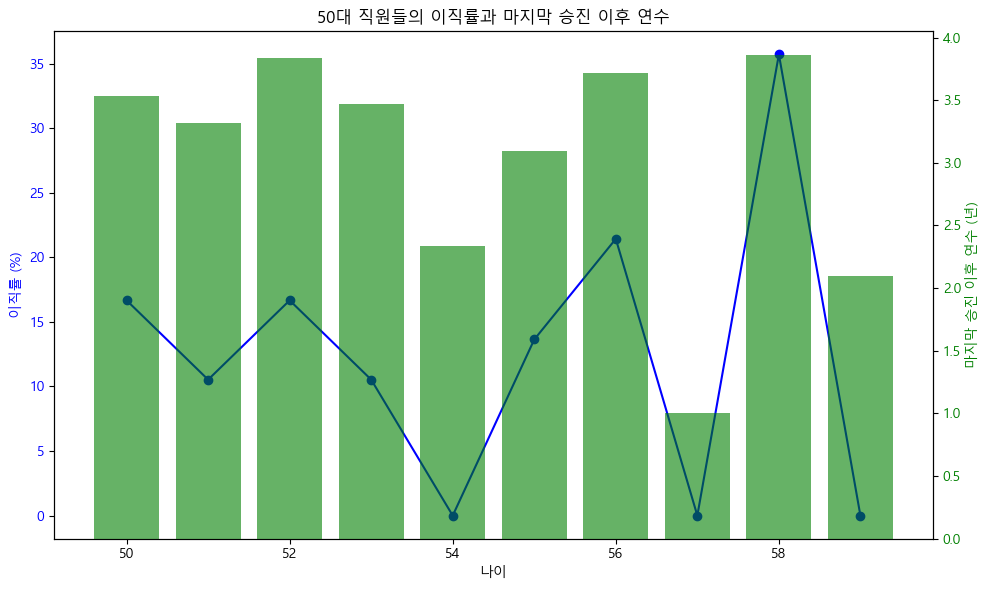

In [7]:
#2-3 시각화
###전처리 실행###
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\ych14\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)

data = data.dropna()
data = data.drop_duplicates()

data_50s = data[data['Age'].between(50, 59)]

age_attrition_50s = data_50s.groupby('Age')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
age_attrition_50s['Attrition Rate'] = age_attrition_50s['Yes'] * 100  # 'Yes' 비율을 이직률로 계산

promotion_years_50s = data_50s.groupby('Age')['YearsSinceLastPromotion'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('나이')
ax1.set_ylabel('이직률 (%)', color='blue')
ax1.plot(age_attrition_50s.index, age_attrition_50s['Attrition Rate'], marker='o', color='blue', label='이직률')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('마지막 승진 이후 연수 (년)', color='green')
ax2.bar(promotion_years_50s.index, promotion_years_50s.values, alpha=0.6, color='green', label='마지막 승진 이후 연수')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('50대 직원들의 이직률과 마지막 승진 이후 연수')
fig.tight_layout()
plt.show()


In [5]:
######################

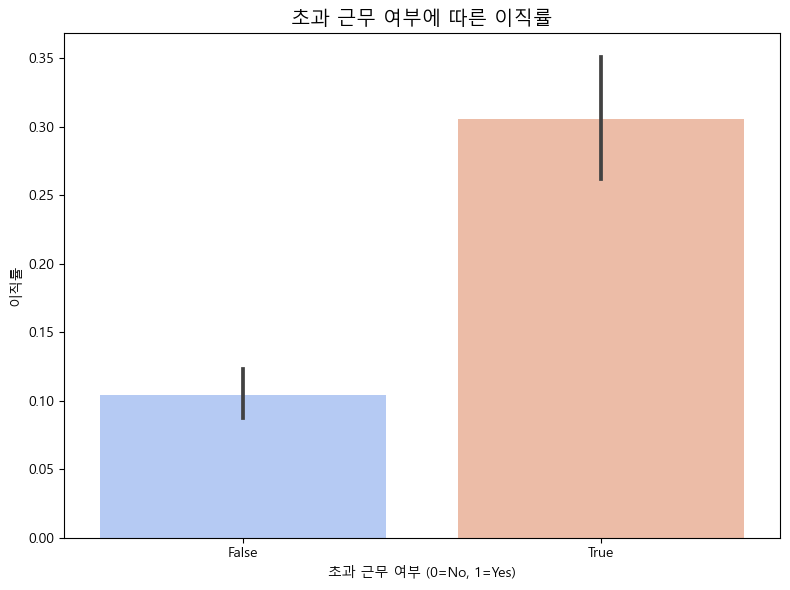

In [17]:
#3번 시각화
data = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='OverTime_Yes', y='Attrition_Yes', data=data, estimator=lambda x: sum(x)/len(x), palette='coolwarm')

plt.title('초과 근무 여부에 따른 이직률', fontsize=14)
plt.xlabel('초과 근무 여부 (0=No, 1=Yes)', fontsize=10)
plt.ylabel('이직률', fontsize=10)
plt.tight_layout()
plt.show()
